In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

In [56]:
df = pd.read_csv('data/data.csv')

### Очистка данных

In [57]:
df.columns

Index(['Answer', 'Answer.f1.afraid.raw', 'Answer.f1.angry.raw',
       'Answer.f1.anxious.raw', 'Answer.f1.ashamed.raw',
       'Answer.f1.awkward.raw', 'Answer.f1.bored.raw', 'Answer.f1.calm.raw',
       'Answer.f1.confused.raw', 'Answer.f1.disgusted.raw',
       'Answer.f1.excited.raw', 'Answer.f1.frustrated.raw',
       'Answer.f1.happy.raw', 'Answer.f1.jealous.raw',
       'Answer.f1.nostalgic.raw', 'Answer.f1.proud.raw', 'Answer.f1.sad.raw',
       'Answer.f1.satisfied.raw', 'Answer.f1.surprised.raw',
       'Answer.t1.exercise.raw', 'Answer.t1.family.raw', 'Answer.t1.food.raw',
       'Answer.t1.friends.raw', 'Answer.t1.god.raw', 'Answer.t1.health.raw',
       'Answer.t1.love.raw', 'Answer.t1.recreation.raw',
       'Answer.t1.school.raw', 'Answer.t1.sleep.raw', 'Answer.t1.work.raw'],
      dtype='object')

In [58]:
df = df[df.columns[:19]]  # удалим колонки с темами записок

In [59]:
df['Answer'] = df['Answer'].str.lower().str.replace('[^\w\s]', '')

In [60]:
df.describe()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,Answer.f1.excited.raw,Answer.f1.frustrated.raw,Answer.f1.happy.raw,Answer.f1.jealous.raw,Answer.f1.nostalgic.raw,Answer.f1.proud.raw,Answer.f1.sad.raw,Answer.f1.satisfied.raw,Answer.f1.surprised.raw
count,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
unique,1473,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"my family was the most salient part of my day,...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,1455,1445,1348,1456,1458,1424,1105,1445,1451,1222,1332,743,1470,1412,1136,1430,882,1409


### Разделение данных

In [61]:
X = df['Answer']
y = df.iloc[:, 1:]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Распределение эмоций

C:\Users\ivana\AppData\Local\Temp\ipykernel_8576\2391539500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='viridis')


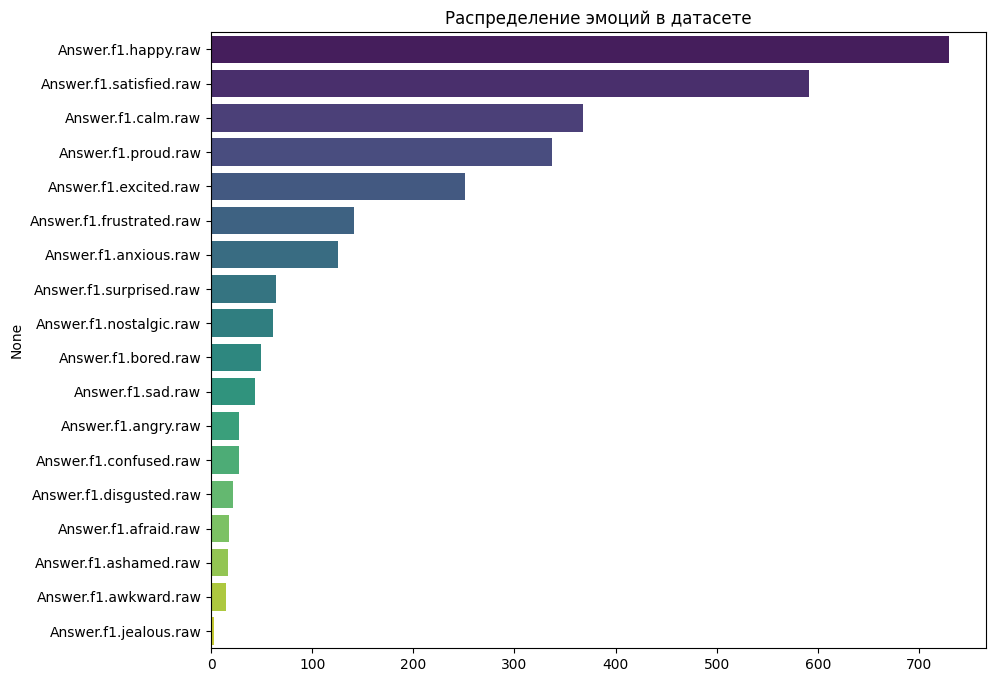

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_counts = y.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette='viridis')
plt.title('Распределение эмоций в датасете')
plt.show()

### TF-IDF преобразование

In [64]:
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Логистическая регрессия

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [66]:
logreg = LogisticRegression(max_iter=1000)
multi_logreg = MultiOutputClassifier(logreg, n_jobs=-1)
multi_logreg.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [67]:
y_pred_logreg = multi_logreg.predict(X_test_tfidf)

In [68]:
acc = []
f = []
for i, col in enumerate(y.columns):
    acc.append(accuracy_score(y_test.iloc[:, i], y_pred_logreg[:, i]))
    f.append(f1_score(y_test.iloc[:, i], y_pred_logreg[:, i], zero_division=1))

In [69]:
print("Средняя accuracy по всем классам:", np.mean(acc))

Средняя accuracy по всем классам: 0.903954802259887


In [70]:
print("Средняя f1-score по всем классам:", np.mean(f))

Средняя f1-score по всем классам: 0.1270464426294815


### SVM

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC()
multi_svc = MultiOutputClassifier(svc, n_jobs=-1)
multi_svc.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=SVC(), n_jobs=-1)

In [73]:
y_pred_svc = multi_svc.predict(X_test_tfidf)

In [74]:
acc = []
f = []
for i, col in enumerate(y.columns):
    acc.append(accuracy_score(y_test.iloc[:, i], y_pred_svc[:, i]))
    f.append(f1_score(y_test.iloc[:, i], y_pred_svc[:, i], zero_division=1))

In [75]:
print("Средняя accuracy по всем классам:", np.mean(acc))

Средняя accuracy по всем классам: 0.9039548022598871


In [76]:
print("Средняя f1-score по всем классам:", np.mean(f))

Средняя f1-score по всем классам: 0.12018866782088582


### Оптимизация параметров логистической регрессии

In [77]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [109]:
def objective(trial):
    с = trial.suggest_loguniform('C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    logreg = LogisticRegression(C=с, penalty=penalty, solver=solver, max_iter=1000)
    multi_logreg = MultiOutputClassifier(logreg, n_jobs=-1)
    
    score = cross_val_score(multi_logreg, X_train_tfidf, y_train, cv=3, scoring=make_scorer(f1_score, average='macro')).mean()
    
    return score

In [110]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-06-30 19:29:15,855] A new study created in memory with name: no-name-55d93192-71db-4930-bc0c-c3efa55a22b1
C:\Users\ivana\AppData\Local\Temp\ipykernel_8576\1594172473.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  с = trial.suggest_loguniform('C', 1e-4, 1e2)
d:\учёба\6 семестр\ПиКПО\emotion_analyser\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2024-06-30 19:29:16,614] Trial 0 finished with value: 0.11246992762112662 and parameters: {'C': 19.32161452174079, 'penalty': 'l2'}. Best is trial 0 with value: 0.11246992762112662.
C:\Users\ivana\AppData\Local\Temp\

In [111]:
study.best_params

{'C': 7.06684980634653, 'penalty': 'l1'}

In [116]:
best_params = study.best_params
C = best_params['C']
penalty = best_params['penalty']
solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

logreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
multi_logreg = MultiOutputClassifier(logreg, n_jobs=-1)
multi_logreg.fit(X_train_tfidf, y_train)

y_pred_logreg = multi_logreg.predict(X_test_tfidf)

In [117]:
acc = []
f = []
for i, col in enumerate(y.columns):
    acc.append(accuracy_score(y_test.iloc[:, i], y_pred_logreg[:, i]))
    f.append(f1_score(y_test.iloc[:, i], y_pred_logreg[:, i], zero_division=1))

In [118]:
print("Средняя accuracy по всем классам:", np.mean(acc))

Средняя accuracy по всем классам: 0.8971751412429378


In [119]:
print("Средняя f1-score по всем классам:", np.mean(f))

Средняя f1-score по всем классам: 0.34856785354690834


### Выводы
Модели `SVC` и логистической регрессии со стандартными гиперпараметрами показали почти что идентичный результат, учитывая дисбаланс классов их 90% `accuracy` не выглядит впечатляюще, а вот 12 `f1_score` выглядит удручающе.
При оптимизации параметров, `accuracy` упала на 1%, но вот `f1_score` вырос на 22 единицы, что сигнализирует об улучшений модели, хотя и все еще слабо.
Наверное стоит использовать finetuning NLP модели, такой как `roberta`, а также провести лемматизацию, стемминг и убрать стоп слова.